# Announcements

**Assignment 5**<br>

**Project 2**<br>
Due: December 1, 2021, class time.

**Practicing makes much difference.** 

**Assignments and Projects**<br>
For assistance in your assignment or project, if you are close to the deadline (e.g., one day earlier), it may be harder to find help.


In [40]:
# Ack: This material was adapted for education purposes from the following sources:
# https://conferences.oreilly.com/oscon/oscon-or-2019/public/schedule/detail/76237.html
# https://github.com/fastai/course-nlp
# https://www.kaggle.com/kitakoj18/exploring-wine-descriptions-with-nlp-and-kmeans

# 1. What is NLP?

## What can you do with NLP?

NLP is a broad field, encompassing a variety of tasks, including:

- Part-of-speech tagging: identify if each word is a noun, verb, adjective, etc.)
- Named entity recognition NER): identify person names, organizations, locations, medical codes, time expressions, quantities, monetary values, etc)
- Question answering
- Speech recognition
- Text-to-speech and Speech-to-text
- Topic modeling
- Sentiment classification
- Language modeling
- Translation

## NLP Tools

- Regex (example: find all phone numbers: 123-456-7890, (123) 456-7890, etc.)
- Tokenization: splitting your text into meaningful units (has a different meaning in security)
- Word embeddings
- Linear algebra/matrix decomposition
- Neural nets
- Hidden Markov Models
- Parse trees

## Python Libraries

- [nltk](https://www.nltk.org/): first released in 2001, very broad NLP library
- [spaCy](https://spacy.io/): creates parse trees, excellent tokenizer, opinionated
- [gensim](https://radimrehurek.com/gensim/): topic modeling and similarity detection
- [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/): Code in Java, but can be used with a Python wrapper. 

specialized tools:
- [PyText](https://pytext-pytext.readthedocs-hosted.com/en/latest/)
- [fastText](https://fasttext.cc/) has library of embeddings

general ML/DL libraries with text features:
- [sklearn](https://scikit-learn.org/stable/): general purpose Python ML library
- [fastai](https://docs.fast.ai/): fast & accurate neural nets using modern best practices, on top of PyTorch

If not already installed:

Use pip to install the following packages: ```nltk, lxml, requests, re, wikipedia, wordcloud```

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline
np.set_printoptions(suppress=True)

### Additional Resources

- [Data source](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html): Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off.  This dataset includes 18,000 newsgroups posts with 20 topics.
- [Chris Manning's book chapter](https://nlp.stanford.edu/IR-book/pdf/18lsi.pdf) on matrix factorization and LSI 
- Scikit learn [truncated SVD LSI details](http://scikit-learn.org/stable/modules/decomposition.html#lsa)

### Other Tutorials
- [Scikit-Learn: Out-of-core classification of text documents](http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html): uses [Reuters-21578](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) dataset (Reuters articles labeled with ~100 categories), HashingVectorizer
- [Text Analysis with Topic Models for the Humanities and Social Sciences](https://de.dariah.eu/tatom/index.html): uses [British and French Literature dataset](https://de.dariah.eu/tatom/datasets.html) of Jane Austen, Charlotte Bronte, Victor Hugo, and more

## NLTK
Natural Language Toolkit is one of the most popular collection of libraries and programs to do NLP. You can find more about it here: http://www.nltk.org/book/ch00.html. 

In [43]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /Users/sagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/sagar/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

NLTK comes pre-loaded with texts from the Project Gutenberg archive that you can use. It also has a collection of informal text from discussion forums, conversations, chat sessions, movie scripts, etc. NLTK has corpora in other languages as well.

In [44]:
from nltk.corpus import gutenberg

# Printing the first 100 characters of each of the files
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:100], '...')


austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt [The Ba

## Getting the data

Data can come from a variety of sources in different formats. Natural language can be in the form of text or speech. In this class, we will be focusing on text-based processing as opposed to speech recognition and synthesis. <br>

Textual data can be stored in databases, dataframes, text files, webpages, etc. A list of text datasets can be found here: https://github.com/niderhoff/nlp-datasets. Let's create a list with a few sentences that will serve as the sample data.

In [45]:
sample_data = ["Today is 10th of November. We are at GA State in Atlanta. Currently we are " \
                "in a MSA 8010 class."]
sample_data

['Today is 10th of November. We are at GA State in Atlanta. Currently we are in a MSA 8010 class.']

## Sentence segmentation
A paragraph is nothing but a collection of sentences. Also called sentence tokenization or sentence boundary disambiguation, this process breaks up sentences by deciding where a sentence starts and ends. Challenges include recognizing ambiguous puncutation marks. For example, `.` can be used for a decimal point, an ellipsis or a period. 

We can use ```sent_tokenize``` from NLTK ```nltk.tokenize``` to get sentences.

In [46]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('Sentence tokens:', sentences)
    return sentences

In [47]:
sample_sentences = get_sent_tokens(sample_data)

Sentence tokens: ['Today is 10th of November.', 'We are at GA State in Atlanta.', 'Currently we are in a MSA 8010 class.']


## Word tokenization
A sentence is a collection of words. Word tokenization is similar to sentence tokenization, but works on words. Let's use ```word_tokenize``` from ```nltk.tokenize``` to get the words. 

In [48]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print('Word tokens:', words)
    return(words)

In [49]:
sample_words = get_word_tokens(sample_sentences)

Word tokens: ['Today', 'is', '10th', 'of', 'November', '.', 'We', 'are', 'at', 'GA', 'State', 'in', 'Atlanta', '.', 'Currently', 'we', 'are', 'in', 'a', 'MSA', '8010', 'class', '.']


## Frequency distribution
Calculates the frequency distribution for each word in the data. Use ```nltk.probability``` from ```FreqDist``` and ```matplotlib```.

In [50]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

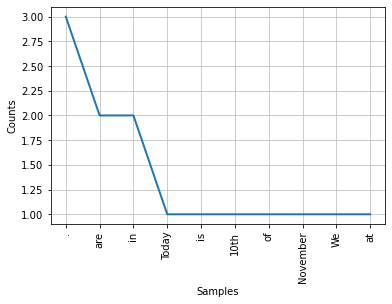

In [51]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

## Cleaning the data

Real world data is often messy and needs cleaning. You can perform preprocessing including:
- Removing special characters and numbers - These are usually not important when trying to derive the semantics
- Removing stopwords - A special category of words that don't have any significance on their own and are often used as filler words or to ensure correct grammer. Eg. the, and, but, of, is, or, those, her, 
- Removing HTML tags - Raw data from webpages can often be laden with HTML tags. Use a library like `BeautifulSoup` to process and remove the tags.
- Standardizing words - This aims to consolidate different versions of the same version Eg. SMS/Twitter language, slang, misspellings 
- Converting to lower case - To ensure uniformity across all words


### Stop words

From [Intro to Information Retrieval](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html):

*Some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words.*

*The general trend in IR systems over time has been from standard use of quite large stop lists (200-300 terms) to very small stop lists (7-12 terms) to no stop list whatsoever. Web search engines generally do not use stop lists.*

In [52]:
from sklearn.feature_extraction import _stop_words

sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

There is no single universal list of stop words.

In [53]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()
        clean_sentences.append(clean_text)
    print('Clean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('Filtered words:', filtered_words)
    return filtered_words

[nltk_data] Downloading package stopwords to /Users/sagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)

Clean sentences: ['today is th of november', 'we are at ga state in atlanta', 'currently we are in a msa  class']
Word tokens: ['today', 'is', 'th', 'of', 'november', 'we', 'are', 'at', 'ga', 'state', 'in', 'atlanta', 'currently', 'we', 'are', 'in', 'a', 'msa', 'class']
Filtered words: ['today', 'th', 'november', 'ga', 'state', 'atlanta', 'currently', 'msa', 'class']


After cleaning the text and using tokenization, we are left with words. Words have certain properties which we'll be exploring in the next few sections. These characteristics can often be used as features for a Machine Learning model.

## POS tagging

The English language is formed of different parts of speech (POS) like nouns, verbs, pronouns, adjectives, etc. POS tagging analyzes the words in a sentences and associates it with a POS tag depending on the way it is used. Also called grammatical tagging or word-category disambiguation. Use ```nltk.pos_tag``` for the process. There are different types of tagsets used with the most common being the Penn Treebank tagset and the Universal tagset. 

![Penn POS tags](https://slideplayer.com/slide/6855236/23/images/11/Penn+TreeBank+POS+Tag+set.jpg)

In [55]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
#     print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sagar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [56]:
sample_tags = get_pos_tags(sample_words)
sample_tags

[[('today', 'NN')],
 [('th', 'NN')],
 [('november', 'NN')],
 [('ga', 'NN')],
 [('state', 'NN')],
 [('atlanta', 'NN')],
 [('currently', 'RB')],
 [('msa', 'NN')],
 [('class', 'NN')]]

## Text processing
Text processing approaches like stemming and lemmatization help in reducing inflectional forms of words. 
### Dictionary and thesaurus
WordNet is a lexical database that also has relationships between different words. You can use synsets to find definitions, synonyms and antonyms for words. You can also find hyponyms and hypernyms using the same process. Hypernym is a generalized concept like 'programming language' whereas hyponym is a specific concept like 'Python' or 'Java'.

![Hypernym and hyponym](https://upload.wikimedia.org/wikipedia/en/thumb/1/1f/Hyponymsandhypernyms.jpg/300px-Hyponymsandhypernyms.jpg)


In [57]:
nltk.download('wordnet')

def get_wordnet_properties(words):
    '''Returns definition, synonyms and antonyms of words'''
    for word in words:
        synonyms = []
        antonyms = []
#         hyponyms = []
#         hypernyms = []
        definitions = []
        for syn in wordnet.synsets(word):
            for lm in syn.lemmas():
                synonyms.append(lm.name())
                if lm.antonyms(): 
                    antonyms.append(lm.antonyms()[0].name())
#             hyponyms.append(syn.hyponyms())
#             hypernyms.append(syn.hypernyms())
#             definitions.append(syn.definition())
            
        print(word)
        print('Synonyms:', synonyms, '\nAntonyms:', antonyms, '\n')
#         print('Definition:', definitions, '\n')

[nltk_data] Downloading package wordnet to /Users/sagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Have you watched the series 'Friends'? Do you remember the [episode](https://youtu.be/B1tOqZUNebs?t=100) where Joey has to write a letter of recommendation for Monica and Chandler for the adoption agency? He uses a thesaurus to make himself sound smarter in the letter! Let's see if we get the same results:

'They are warm, nice people with big hearts' -> 'They are humid, prepossessing Homo Sapiens with full-sized aortic pumps'

![Joey Friends](https://media.giphy.com/media/VEsfbW0pBu145PPhOi/giphy.gif)

In [58]:

joey_dialogue = ['they', 'are', 'warm', 'nice', 'people', 'with', 'big', 'hearts']
get_wordnet_properties(joey_dialogue)

NameError: name 'wordnet' is not defined

## Word Sense Disambiguation

These synsets are also used for disambiguation, particularly Word Sense Disambiguation using Lesk Algorithm. See: http://www.nltk.org/howto/wsd.html

In [ ]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
print(lesk(sent, 'bank', 'n'))

In [ ]:
sent = ['I', 'was', 'sitting', 'by', 'the', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

In [ ]:
sent = ['I', 'was', 'waiting', 'at', 'the', 'blood', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

## Stemming and Lemmatization

from [Information Retrieval](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) textbook:

Are the below words the same?

*organize, organizes, and organizing*

*democracy, democratic, and democratization*

Stemming and Lemmatization both generate the root form of the words. 

Lemmatization uses the rules about a language.  The resulting tokens are all actual words

"Stemming is the poor-man’s lemmatization." (Noah Smith, 2011) Stemming is a crude heuristic that chops the ends off of words.  The resulting tokens may not be actual words. Stemming is faster.

In [ ]:
import nltk
nltk.download('wordnet')

### Stemming
Stemming tries to cut off at the ends of the words in the hope of deriving the base form. Stems aren't always real words. Use ```PorterStemmer``` from ```ntlk.stem```.

In [ ]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [ ]:
[porter.stem(word) for word in word_list]

### Lemmatization
Lemmatization groups different inflected forms of a words so they can be mapped to the same base. Lemmas are real words. More complex than stemming, context of words is also analyzed. Uses WordNet which is a lexical English database. 
Use ```WordNetLemmatizer``` from ```nltk.stem``` and provide it the POS tag along with the word. NLTK’s POS tags are in a format different from to that of wordnet lemmatizer, so a mapping is needed. https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python


In [ ]:
word_list = ['feet', 'foot', 'foots', 'footing']

[wnl.lemmatize(word) for word in word_list]

Stemming and lemmatization are language dependent.  Languages with more complex morphologies may show bigger benefits.  For example, Sanskrit has a very [large number of verb forms](https://en.wikipedia.org/wiki/Sanskrit_verbs). 

These were long considered standard techniques, but they can often **hurt** your performance **if using deep learning**. Stemming, lemmatization, and removing stop words all involve throwing away information.

However, they can still be useful when working with simpler models.

## Distances 
You can calculate distances between words. There are a variety of distance metrics available: https://en.wikipedia.org/wiki/String_metric. The most common ones are Levenshtein, Cosine distances and Jaccard similarity. Applications include spell checking, correction for OCRs and Machine Translation. For an implementation of a spell checker, see here: https://norvig.com/spell-correct.html

![Edit distance](https://i.stack.imgur.com/5Pjr7.png)


## Named Entity Recognition (NER) 

Also known as entity chunking or extraction, is a sub-process of information extraction. This involves identifies and classifies named entities mentions into sub-categories like person name, organization, location, time, etc.  In other words, Named Entity Recognition (NER) labels sequences of words in a text which are the names of things, such as person and company names, or gene and protein names. 

Some of the most popular NER models are here: https://towardsdatascience.com/a-review-of-named-entity-recognition-ner-using-automatic-summarization-of-resumes-5248a75de175. <br>

Example use-cases include customer support, search engine, news classification. Another emerging application is for redacting personally identifiable information (PII). A great demo of NER in action is here: https://explosion.ai/demos/displacy-ent


## Bag of words
Bag of words is an approach for text feature extraction. Just imagine a bag of popcorn, 
and each popcorn kernel represents a word that is present in the text. Each sentence can be represented as a vector
of all the words present in a vocabulary. If a word is present in the sentence, it is 1, otherwise 0.

![Bag of words](https://cdn-images-1.medium.com/max/1600/1*zMdHVQQ7HYv_mMZ5Ne-2yQ.png)

## TF-IDF
Term-frequency inverse document frequency assigns scores to words inside a document. Commonly occuring words in all documents would have less weightage.
![TF IDF](http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic.png)

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    ''''''
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 

In [ ]:
get_bag_of_words(sample_data)

## Word embeddings - Word2Vec
Vector space model - represent words and sentences as vectors to get semantic relationships. A really good tutorial for Word2Vec is here: https://www.kaggle.com/alvations/word2vec-embedding-using-gensim-and-nltk

![Word2Vec](http://www.flyml.net/wp-content/uploads/2016/11/w2v-3-samples.png)

## Machine Learning using Natural Language Processing
Machine Learning includes two approaches: supervised and unsupervised. Supervised learning works on data that already has labels i.e. they provide supervision to the model. Eg. Classification, Regression. Unsupervised learning is to find out the inherent structure present in the data and there are no labels i.e. no supervision. Eg. Clustering.

A lot of these text properties can be used as features for Machine Learning systems. One specific case is text classification. A more detailed resource is here: https://www.nltk.org/book/ch06.html

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. More details here: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [63]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
print('Classes present:', news.target_names)
print('Number of classes present:', len(news.target_names))
print('Number of data points:', len(news.data))

Classes present: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of classes present: 20
Number of data points: 18846


In [64]:
# Printing the first few characters for each category

for text, num_label in zip(news.data[:10], news.target[:10]):
    print('[%s]:\t\t "%s ..."' % (news.target_names[num_label], text[:100].split('\n')[0]))

[rec.sport.hockey]:		 "From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> ..."
[comp.sys.ibm.pc.hardware]:		 "From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson) ..."
[talk.politics.mideast]:		 "From: hilmi-er@dsv.su.se (Hilmi Eren) ..."
[comp.sys.ibm.pc.hardware]:		 "From: guyd@austin.ibm.com (Guy Dawson) ..."
[comp.sys.mac.hardware]:		 "From: Alexander Samuel McDiarmid <am2o+@andrew.cmu.edu> ..."
[sci.electronics]:		 "From: tell@cs.unc.edu (Stephen Tell) ..."
[comp.sys.mac.hardware]:		 "From: lpa8921@tamuts.tamu.edu (Louis Paul Adams) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[talk.religion.misc]:		 "From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) ..."


### Dividing into training and test data sets
Think of it as learning in class (training) and then taking an exam (testing) to evaluate your performance. The testing is done on unseen data to know the actual abilities of the classifier i.e. preventing memorization or rote-learning. Test data set is usually 20-25% of the data set. You can also use cross-validation to ensure robustness of classifier.

In [65]:
from sklearn.model_selection import train_test_split
 
def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
 
    classifier.fit(X_train, y_train)
    print("Accuracy:", classifier.score(X_test, y_test))
    return classifier

### Naive Bayes
Probabilistic classifier based on Bayes theorem. Assumes independence among the features. Details here: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

We'll be using Pipeline to apply transformations sequentially: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Adapted from: https://nlpforhackers.io/text-classification/


### Feature: TF-IDF 

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
model_1 = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])

In [67]:
print('Results for TF-IDF as feature:')
train(model_1, news.data, news.target)

Results for TF-IDF as feature:
Accuracy: 0.8463497453310697


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

### Feature: TF i.e. Removing IDF from TF-IDF

In [68]:
model_2 = Pipeline([('vectorizer', TfidfVectorizer(use_idf=False)),
                    ('classifier', MultinomialNB())])

In [69]:
print('Results for TF as feature, removing IDF')
train(model_2, news.data, news.target)

Results for TF as feature, removing IDF
Accuracy: 0.756578947368421


Pipeline(steps=[('vectorizer', TfidfVectorizer(use_idf=False)),
                ('classifier', MultinomialNB())])

**Insight:** So, IDF does make a huge difference!

### Feature: TF-IDF + stopwords removal

In [70]:
model_3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                    ('classifier', MultinomialNB())])

In [71]:
print('Results for TF-IDF as feature, using stopword removal:')
train(model_3, news.data, news.target)

Results for TF-IDF as feature, using stopword removal:
Accuracy: 0.8777589134125636


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5
Trying simple things may work too!

In [74]:
model_4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5)),
                    ('classifier', MultinomialNB())])

In [75]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5:')
train(model_4, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 5:
Accuracy: 0.8820033955857386


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 10

In [76]:
model_5 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=10)),
                    ('classifier', MultinomialNB())])

In [77]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 10:')
train(model_5, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 10:
Accuracy: 0.8745755517826825


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=10,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

Make sure to not go overboard with simple steps!

### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha
Alpha is a hyperparameter for smoothing in Multinomial NB that controls the model itself.

In [82]:
import string
model_6 = Pipeline([('vectorizer', TfidfVectorizer(min_df = 5,
                     stop_words=stopwords.words('english') + list(string.punctuation))),
                   ('classifier', MultinomialNB(alpha=0.05))])

In [ ]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha:')
train(model_6, news.data, news.target)

### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha + stemming
Let's check if stemming the words makes any difference.

In [ ]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
 
def stem_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in word_tokenize(text)]
 
model_7 = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=stem_tokenizer, min_df = 5,
                     stop_words=stopwords.words('english') + list(string.punctuation))),
                   ('classifier', MultinomialNB(alpha=0.05))])

In [ ]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 + \
       tuning hyperparameter alpha + stemming:')
train(model_7, news.data, news.target)

Feel free to experiment with other features and see how well the classifier performs!

## Sentiment analysis

NLTK's VADER algorithm is used to detect polarity of words and establish the overall sentiment (compound score) for sentences. We're using a small sample of IMDB review titles for Captain Marvel. 

In [83]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

def get_sentiment(data):
    '''Get sentiment of sentences using VADER algorithm'''
    scorer = SentimentIntensityAnalyzer()
    for sentence in reviews:
        print(sentence)
        ss = scorer.polarity_scores(sentence)
        for k in ss:
            print('{0}: {1}, ' .format(k, ss[k]), end='')
        print()  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sagar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
reviews = ["I've watched this movie for the record, cause I had no particular expectations for it.",
          "It's fine.",
          "Not bad, not great either.",
          "Captain Marvel is another fine Marvel adventure.",
          "Captivating story and great visuals.",
          "Confusing boring childish.",
          "Strong Hero. Weak Film."]

get_sentiment(reviews)

I've watched this movie for the record, cause I had no particular expectations for it.
neg: 0.145, neu: 0.855, pos: 0.0, compound: -0.296, 
It's fine.
neg: 0.0, neu: 0.357, pos: 0.643, compound: 0.2023, 
Not bad, not great either.
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.6754, 
Captain Marvel is another fine Marvel adventure.
neg: 0.0, neu: 0.236, pos: 0.764, compound: 0.8271, 
Captivating story and great visuals.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.6249, 
Confusing boring childish.
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.6597, 
Strong Hero. Weak Film.
neg: 0.269, neu: 0.093, pos: 0.639, compound: 0.6124, 


## Topic modeling
Topic modeling is an unsupervised ML method used to find inherent structure in documents. It learns
representations of topics in documents which allows grouping of different documents together. We will
use ```Gensim``` library and Latent Dirichlet Allocation (LDA) for this.

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

Adapted from https://kleiber.me/blog/2017/07/22/tutorial-lda-wikipedia/

![Topic modeling](https://i.stack.imgur.com/vI8Lc.png)

In [ ]:
import wikipedia, random

def fetch_data(article_names):
    '''Fetching the data from given Wikipedia articles'''
    wikipedia_random_articles = wikipedia.random(2)
    wikipedia_random_articles.extend(article_names)
    wikipedia_random_articles
    print(wikipedia_random_articles)
    
    wikipedia_articles = []
    for wikipedia_article in wikipedia_random_articles:
        wikipedia_articles.append([wikipedia_article, 
                                   wikipedia.page(wikipedia_article).content])
    return wikipedia_articles

In [ ]:
nltk.download('stopwords')    
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean(article):
    '''Cleaning the article contents and getting the word stems'''
    title, document = article
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if token not in 
                    stopwords.words('english')]
    tokens_stemmed = [PorterStemmer().stem(token) for token 
                      in tokens_clean]
    return (title, tokens_stemmed)

In [ ]:
from gensim import corpora, models
import gensim

article_names = ['Music', 'Grace Hopper', 'Portland, Oregon', 'Data', 'Compiler', 'Oregon']
wikipedia_articles = fetch_data(article_names)
wikipedia_articles
wikipedia_articles_clean = list(map(clean, wikipedia_articles))

In [ ]:
article_contents = [article[1] for article in wikipedia_articles_clean]
dictionary = corpora.Dictionary(article_contents)
corpus = [dictionary.doc2bow(article) for article in 
          article_contents[:-1]] # All except 'Compiler'

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, 
                                            id2word = dictionary, 
                                            passes=100)

topic_results = lda_model.print_topics(num_topics=6, num_words=5)
topic_results

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
print(list(lda_model[[dictionary.doc2bow(article_contents[-1])]]))

## Resources

- More on NLP https://monkeylearn.com/blog/definitive-guide-natural-language-processing/
- A very comprehensive list of resources by Penn https://www.seas.upenn.edu/~romap/nlp-resources.html
- Peter Norvig's spell corrector http://norvig.com/spell-correct.html
- Applications and datasets https://machinelearningmastery.com/datasets-natural-language-processing/
- More datasets https://gengo.ai/datasets/the-best-25-datasets-for-natural-language-processing/
- https://towardsdatascience.com/text-analytics-topic-modelling-on-music-genres-song-lyrics-deb82c86caa2
- Collection of tutorials https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc
- Text classification https://textminingonline.com/dive-into-nltk-part-vii-a-preliminary-study-on-text-classification


## Unsupervised NLP

## import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

## load data

In [ ]:
winedf = pd.read_csv('winemag-data_first150k.csv')
winedf.head()

In [ ]:
winedf.info()

In [ ]:
winedf[winedf['description'].duplicated(keep = False)].sort_values('description').head(8)

In [ ]:
winedf = winedf.drop_duplicates('description')

In [ ]:
variety_df = winedf.groupby('variety').filter(lambda x: len(x) > 1500)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
variety_df['variety'].unique()

## Data Pre-processing

In [ ]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = variety_df['description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [ ]:
word_features = vectorizer.get_feature_names()
word_features[550:575]

In [ ]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

In [ ]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [ ]:
X3

## K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [ ]:
variety_df['cluster'] = kmeans.labels_

In [ ]:
variety_df['cluster']

In [ ]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

## Resources

**Books**

Here are a few helpful references:

- [**Speech and Language Processing**](https://web.stanford.edu/~jurafsky/slp3/), by Dan Jurafsky and James H. Martin (free PDF)

- [**Introduction to Information Retrieval**](https://nlp.stanford.edu/IR-book/html/htmledition/irbook.html) by By Christopher D. Manning, Prabhakar Raghavan, and Hinrich Schütze (free online)

- [**Natural Language Processing with PyTorch**](https://learning.oreilly.com/library/view/natural-language-processing/9781491978221/) by Brian McMahan and Delip Rao (need to purchase or have O'Reilly Safari account) 

**Blogs**

Good NLP-related blogs:
- [Sebastian Ruder](http://ruder.io/)
- [Joyce Xu](https://medium.com/@joycex99)
- [Jay Alammar](https://jalammar.github.io/)
- [Stephen Merity](https://smerity.com/articles/articles.html)
- [Rachael Tatman](https://towardsdatascience.com/evaluating-text-output-in-nlp-bleu-at-your-own-risk-e8609665a213)